같은 데이터와 output 산출을 위해 시드값 고정

In [204]:
import torch
from torch import nn, cuda
from torch.nn import functional as F
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
import random
import os
import numpy as np
import tensorflow as tf



In [272]:
from sklearn.model_selection import GridSearchCV

In [205]:
# 실험의 재생산을 위한 seed값 고정 함수
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # TensorFlow를 사용하는 경우
    tf.random.set_seed(seed)
    torch.backends.cudnn.deterministic = True

In [206]:
# 결과 재생산을 위한 seed값 고정
seed = 42
seed_everything(seed)

In [207]:
import pandas as pd

df_ = pd.read_csv('c:/Users/chanyoung/Desktop/young_workspace/ba_module1/ML_pjt/BANK_pjt/data_for_bank_all.csv',index_col=0)
# df_.index.name = 'Date'

# 결과 확인
df_

,Open,High,Low,Close,Volume,log_return,target,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,base,cofix_short,exchange
Date,,,,,,,,,,,,,,,,
2014-12-23,7290.0,7290.0,7250.0,7290.0,2424.0,0.002060,1,7252.0,7275.5,7511.166667,7756.750000,8018.000000,7917.687500,2.0,2.00,1102.7
2014-12-24,7300.0,7365.0,7265.0,7365.0,21753.0,0.010236,1,7269.0,7264.5,7491.000000,7741.333333,8015.125000,7912.687500,2.0,2.00,1102.6
2014-12-26,7400.0,7420.0,7360.0,7385.0,7384.0,0.002712,1,7292.0,7271.0,7472.333333,7726.416667,8013.458333,7909.062500,2.0,2.00,1098.7
2014-12-29,7465.0,7465.0,7320.0,7340.0,10208.0,-0.006112,0,7319.0,7284.0,7454.666667,7713.583333,8011.916667,7905.520833,2.0,2.05,1097.8
2014-12-30,7375.0,7375.0,7110.0,7135.0,30329.0,-0.028327,0,7331.0,7287.5,7441.666667,7703.583333,8010.083333,7902.104167,2.0,2.05,1099.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,8190.0,8205.0,8010.0,8055.0,886870.0,-0.016621,0,8381.0,8471.5,8218.333333,7572.583333,6988.500000,6537.666667,3.5,3.57,1349.4
2024-04-02,8005.0,8085.0,7925.0,8025.0,978698.0,-0.003731,0,8275.0,8423.0,8224.833333,7597.583333,7004.000000,6545.458333,3.5,3.57,1352.1
2024-04-03,8000.0,8035.0,7870.0,7875.0,783412.0,-0.018868,0,8174.0,8389.0,8224.000000,7623.750000,7017.708333,6553.375000,3.5,3.57,1348.9


In [208]:
#타겟변수 따로 저장해두기
target = df_[['target']]
target 

,target
Date,
2014-12-23,1
2014-12-24,1
2014-12-26,1
2014-12-29,0
2014-12-30,0
...,...
2024-04-01,0
2024-04-02,0
2024-04-03,0


In [209]:
#log_return 띠기
import numpy as np
df_ = df_.drop(columns=["log_return"])

In [210]:
df_

,Open,High,Low,Close,Volume,target,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,base,cofix_short,exchange
Date,,,,,,,,,,,,,,,
2014-12-23,7290.0,7290.0,7250.0,7290.0,2424.0,1,7252.0,7275.5,7511.166667,7756.750000,8018.000000,7917.687500,2.0,2.00,1102.7
2014-12-24,7300.0,7365.0,7265.0,7365.0,21753.0,1,7269.0,7264.5,7491.000000,7741.333333,8015.125000,7912.687500,2.0,2.00,1102.6
2014-12-26,7400.0,7420.0,7360.0,7385.0,7384.0,1,7292.0,7271.0,7472.333333,7726.416667,8013.458333,7909.062500,2.0,2.00,1098.7
2014-12-29,7465.0,7465.0,7320.0,7340.0,10208.0,0,7319.0,7284.0,7454.666667,7713.583333,8011.916667,7905.520833,2.0,2.05,1097.8
2014-12-30,7375.0,7375.0,7110.0,7135.0,30329.0,0,7331.0,7287.5,7441.666667,7703.583333,8010.083333,7902.104167,2.0,2.05,1099.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,8190.0,8205.0,8010.0,8055.0,886870.0,0,8381.0,8471.5,8218.333333,7572.583333,6988.500000,6537.666667,3.5,3.57,1349.4
2024-04-02,8005.0,8085.0,7925.0,8025.0,978698.0,0,8275.0,8423.0,8224.833333,7597.583333,7004.000000,6545.458333,3.5,3.57,1352.1
2024-04-03,8000.0,8035.0,7870.0,7875.0,783412.0,0,8174.0,8389.0,8224.000000,7623.750000,7017.708333,6553.375000,3.5,3.57,1348.9


In [211]:
### log_return (로그 변동률) 생성
df_log = np.log(df_/df_.shift(1))

c:\Users\chanyoung\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [212]:
df_log

,Open,High,Low,Close,Volume,target,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,base,cofix_short,exchange
Date,,,,,,,,,,,,,,,
2014-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-24,0.001371,0.010236,0.002067,0.010236,2.194333,0.0,0.002341,-0.001513,-0.002689,-0.001989,-0.000359,-0.000632,0.0,0.000000,-0.000091
2014-12-26,0.013606,0.007440,0.012992,0.002712,-1.080436,0.0,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458,0.0,0.000000,-0.003543
2014-12-29,0.008745,0.006046,-0.005450,-0.006112,0.323856,-inf,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448,0.0,0.024693,-0.000819
2014-12-30,-0.012130,-0.012130,-0.029108,-0.028327,1.088933,NaN,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432,0.0,0.000000,0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.017550,-0.019313,-0.019778,-0.016621,0.174036,NaN,-0.012215,-0.005591,0.002355,0.003296,0.002340,0.001336,0.0,-0.008368,0.001632
2024-04-02,-0.022848,-0.014733,-0.010668,-0.003731,0.098525,NaN,-0.012728,-0.005742,0.000791,0.003296,0.002215,0.001191,0.0,0.000000,0.001999
2024-04-03,-0.000625,-0.006203,-0.006964,-0.018868,-0.222564,NaN,-0.012281,-0.004045,-0.000101,0.003438,0.001955,0.001209,0.0,0.000000,-0.002369


In [213]:
df_log.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'target', 'moving_average_5',
       'moving_average_10', 'moving_average_30', 'moving_average_60',
       'moving_average_120', 'moving_average_240', 'base', 'cofix_short',
       'exchange'],
      dtype='object')

In [214]:
df_log = df_log[['Open', 'High', 'Low', 'Close', 'Volume','moving_average_5',
       'moving_average_10', 'moving_average_30', 'moving_average_60',
       'moving_average_120', 'moving_average_240']]

In [215]:
df_log

,Open,High,Low,Close,Volume,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240
Date,,,,,,,,,,,
2014-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-24,0.001371,0.010236,0.002067,0.010236,2.194333,0.002341,-0.001513,-0.002689,-0.001989,-0.000359,-0.000632
2014-12-26,0.013606,0.007440,0.012992,0.002712,-1.080436,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458
2014-12-29,0.008745,0.006046,-0.005450,-0.006112,0.323856,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448
2014-12-30,-0.012130,-0.012130,-0.029108,-0.028327,1.088933,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.017550,-0.019313,-0.019778,-0.016621,0.174036,-0.012215,-0.005591,0.002355,0.003296,0.002340,0.001336
2024-04-02,-0.022848,-0.014733,-0.010668,-0.003731,0.098525,-0.012728,-0.005742,0.000791,0.003296,0.002215,0.001191
2024-04-03,-0.000625,-0.006203,-0.006964,-0.018868,-0.222564,-0.012281,-0.004045,-0.000101,0.003438,0.001955,0.001209


In [216]:
df_log.isna().sum()

Open                  1
High                  1
Low                   1
Close                 1
Volume                1
moving_average_5      1
moving_average_10     1
moving_average_30     1
moving_average_60     1
moving_average_120    1
moving_average_240    1
dtype: int64

In [217]:
df_log = df_log.dropna()

In [218]:
df_log

,Open,High,Low,Close,Volume,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240
Date,,,,,,,,,,,
2014-12-24,0.001371,0.010236,0.002067,0.010236,2.194333,0.002341,-0.001513,-0.002689,-0.001989,-0.000359,-0.000632
2014-12-26,0.013606,0.007440,0.012992,0.002712,-1.080436,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458
2014-12-29,0.008745,0.006046,-0.005450,-0.006112,0.323856,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448
2014-12-30,-0.012130,-0.012130,-0.029108,-0.028327,1.088933,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432
2015-01-02,-0.034486,-0.032383,-0.007766,-0.009859,-1.195077,-0.003827,-0.001373,-0.002669,-0.001852,-0.000395,-0.000559
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.017550,-0.019313,-0.019778,-0.016621,0.174036,-0.012215,-0.005591,0.002355,0.003296,0.002340,0.001336
2024-04-02,-0.022848,-0.014733,-0.010668,-0.003731,0.098525,-0.012728,-0.005742,0.000791,0.003296,0.002215,0.001191
2024-04-03,-0.000625,-0.006203,-0.006964,-0.018868,-0.222564,-0.012281,-0.004045,-0.000101,0.003438,0.001955,0.001209


In [219]:
# df_log.to_csv('df_log.csv')

In [220]:
df_log_target = pd.merge(df_log, target, on='Date', how='inner')

In [221]:
df_log_target = df_log_target.drop(columns=["Close"])

In [222]:
df_log_target
#2284 rows × 12 columns

,Open,High,Low,Volume,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,target
Date,,,,,,,,,,,
2014-12-24,0.001371,0.010236,0.002067,2.194333,0.002341,-0.001513,-0.002689,-0.001989,-0.000359,-0.000632,1
2014-12-26,0.013606,0.007440,0.012992,-1.080436,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458,1
2014-12-29,0.008745,0.006046,-0.005450,0.323856,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448,0
2014-12-30,-0.012130,-0.012130,-0.029108,1.088933,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432,0
2015-01-02,-0.034486,-0.032383,-0.007766,-1.195077,-0.003827,-0.001373,-0.002669,-0.001852,-0.000395,-0.000559,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.017550,-0.019313,-0.019778,0.174036,-0.012215,-0.005591,0.002355,0.003296,0.002340,0.001336,0
2024-04-02,-0.022848,-0.014733,-0.010668,0.098525,-0.012728,-0.005742,0.000791,0.003296,0.002215,0.001191,0
2024-04-03,-0.000625,-0.006203,-0.006964,-0.222564,-0.012281,-0.004045,-0.000101,0.003438,0.001955,0.001209,0


In [223]:
# df_log_target.to_csv('df_log_target.csv')

In [224]:
df_log_target

,Open,High,Low,Volume,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,target
Date,,,,,,,,,,,
2014-12-24,0.001371,0.010236,0.002067,2.194333,0.002341,-0.001513,-0.002689,-0.001989,-0.000359,-0.000632,1
2014-12-26,0.013606,0.007440,0.012992,-1.080436,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458,1
2014-12-29,0.008745,0.006046,-0.005450,0.323856,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448,0
2014-12-30,-0.012130,-0.012130,-0.029108,1.088933,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432,0
2015-01-02,-0.034486,-0.032383,-0.007766,-1.195077,-0.003827,-0.001373,-0.002669,-0.001852,-0.000395,-0.000559,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.017550,-0.019313,-0.019778,0.174036,-0.012215,-0.005591,0.002355,0.003296,0.002340,0.001336,0
2024-04-02,-0.022848,-0.014733,-0.010668,0.098525,-0.012728,-0.005742,0.000791,0.003296,0.002215,0.001191,0
2024-04-03,-0.000625,-0.006203,-0.006964,-0.222564,-0.012281,-0.004045,-0.000101,0.003438,0.001955,0.001209,0


In [225]:
#미래y예측값 설정을 위해
df_log_target['target'] = df_log_target['target'].shift(1)

In [226]:
df_log_target = df_log_target.dropna()

In [227]:
df_log_target #2283 rows × 11 columns

,Open,High,Low,Volume,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,target
Date,,,,,,,,,,,
2014-12-26,0.013606,0.007440,0.012992,-1.080436,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458,1.0
2014-12-29,0.008745,0.006046,-0.005450,0.323856,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448,1.0
2014-12-30,-0.012130,-0.012130,-0.029108,1.088933,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432,0.0
2015-01-02,-0.034486,-0.032383,-0.007766,-1.195077,-0.003827,-0.001373,-0.002669,-0.001852,-0.000395,-0.000559,0.0
2015-01-05,-0.010582,-0.010560,-0.018599,1.353097,-0.006181,-0.001926,-0.002991,-0.001996,-0.000494,-0.000646,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.017550,-0.019313,-0.019778,0.174036,-0.012215,-0.005591,0.002355,0.003296,0.002340,0.001336,0.0
2024-04-02,-0.022848,-0.014733,-0.010668,0.098525,-0.012728,-0.005742,0.000791,0.003296,0.002215,0.001191,0.0
2024-04-03,-0.000625,-0.006203,-0.006964,-0.222564,-0.012281,-0.004045,-0.000101,0.003438,0.001955,0.001209,0.0


In [228]:
df_log_target['target'] = df_log_target['target'].values.astype(int)

C:\Users\chanyoung\AppData\Local\Temp\ipykernel_52456\1730821277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log_target['target'] = df_log_target['target'].values.astype(int)


In [229]:
df_log_target

,Open,High,Low,Volume,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,target
Date,,,,,,,,,,,
2014-12-26,0.013606,0.007440,0.012992,-1.080436,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458,1
2014-12-29,0.008745,0.006046,-0.005450,0.323856,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448,1
2014-12-30,-0.012130,-0.012130,-0.029108,1.088933,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432,0
2015-01-02,-0.034486,-0.032383,-0.007766,-1.195077,-0.003827,-0.001373,-0.002669,-0.001852,-0.000395,-0.000559,0
2015-01-05,-0.010582,-0.010560,-0.018599,1.353097,-0.006181,-0.001926,-0.002991,-0.001996,-0.000494,-0.000646,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.017550,-0.019313,-0.019778,0.174036,-0.012215,-0.005591,0.002355,0.003296,0.002340,0.001336,0
2024-04-02,-0.022848,-0.014733,-0.010668,0.098525,-0.012728,-0.005742,0.000791,0.003296,0.002215,0.001191,0
2024-04-03,-0.000625,-0.006203,-0.006964,-0.222564,-0.012281,-0.004045,-0.000101,0.003438,0.001955,0.001209,0


In [230]:
#라이브러리 호출
import pandas as pd
import numpy as np

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


# 단일

In [231]:
df_log['Close']

Date
2014-12-24    0.010236
2014-12-26    0.002712
2014-12-29   -0.006112
2014-12-30   -0.028327
2015-01-02   -0.009859
                ...   
2024-04-01   -0.016621
2024-04-02   -0.003731
2024-04-03   -0.018868
2024-04-04    0.023220
2024-04-05   -0.009349
Name: Close, Length: 2284, dtype: float64

<b/>하나의 변수</b>에 대한 시계열 데이터를 분석하는 모델은 기본적으로 AR, MA, ARMA, ARIMA 모델

-> ar(0,1,0)이 적합하다고 나왔으므로 arima 은 진행x


In [232]:
## 데이터를 학습 세트와 테스트 세트로 분리
y = df_log['Close']
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42,shuffle=False)

In [233]:
ar_model = AutoReg(y_train, lags=1)

c:\Users\chanyoung\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [234]:
# AR(p) 모델 학습
ar_model_fitted = ar_model.fit()

In [235]:
# 예측 및 성능 평가
y_pred_ar = ar_model_fitted.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

c:\Users\chanyoung\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\chanyoung\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\chanyoung\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [236]:
metrics = {
    "AR(p)": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ar)),
        "MAE": mean_absolute_error(y_test, y_pred_ar)
}}
metrics

#{'AR(p)': {'RMSE': 0.015714823439810604, 'MAE': 0.01162912891120239}}

{'AR(p)': {'RMSE': 0.015714823439810604, 'MAE': 0.01162912891120239}}

In [237]:
y_test

Date
2022-05-31    0.001301
2022-06-02   -0.025685
2022-06-03    0.002665
2022-06-07   -0.014071
2022-06-08    0.003368
                ...   
2024-04-01   -0.016621
2024-04-02   -0.003731
2024-04-03   -0.018868
2024-04-04    0.023220
2024-04-05   -0.009349
Name: Close, Length: 457, dtype: float64

In [238]:
y_pred_ar

1827   -0.000232
1828    0.000034
1829    0.000023
1830    0.000023
1831    0.000023
          ...   
2279    0.000023
2280    0.000023
2281    0.000023
2282    0.000023
2283    0.000023
Length: 457, dtype: float64

In [239]:
# 방향성 판단 (상승=1, 하락=0)
actual_direction = np.diff(y_test) > 0
predicted_direction = np.diff(y_pred_ar) > 0

# 정확도 계산
accuracy = np.mean(actual_direction == predicted_direction)
print(f'Accuracy: {accuracy:.2f}')

#Accuracy: 0.48

Accuracy: 0.48


### 슬라이딩 윈도우 10 넣어서 훈련 예측

In [240]:
# 데이터 프레임에서'Close'만을 특징으로 사용
features = df_log['Close']
features

Date
2014-12-24    0.010236
2014-12-26    0.002712
2014-12-29   -0.006112
2014-12-30   -0.028327
2015-01-02   -0.009859
                ...   
2024-04-01   -0.016621
2024-04-02   -0.003731
2024-04-03   -0.018868
2024-04-04    0.023220
2024-04-05   -0.009349
Name: Close, Length: 2284, dtype: float64

In [241]:
df_log

,Open,High,Low,Close,Volume,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240
Date,,,,,,,,,,,
2014-12-24,0.001371,0.010236,0.002067,0.010236,2.194333,0.002341,-0.001513,-0.002689,-0.001989,-0.000359,-0.000632
2014-12-26,0.013606,0.007440,0.012992,0.002712,-1.080436,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458
2014-12-29,0.008745,0.006046,-0.005450,-0.006112,0.323856,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448
2014-12-30,-0.012130,-0.012130,-0.029108,-0.028327,1.088933,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432
2015-01-02,-0.034486,-0.032383,-0.007766,-0.009859,-1.195077,-0.003827,-0.001373,-0.002669,-0.001852,-0.000395,-0.000559
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.017550,-0.019313,-0.019778,-0.016621,0.174036,-0.012215,-0.005591,0.002355,0.003296,0.002340,0.001336
2024-04-02,-0.022848,-0.014733,-0.010668,-0.003731,0.098525,-0.012728,-0.005742,0.000791,0.003296,0.002215,0.001191
2024-04-03,-0.000625,-0.006203,-0.006964,-0.018868,-0.222564,-0.012281,-0.004045,-0.000101,0.003438,0.001955,0.001209


In [242]:
from sklearn.model_selection import train_test_split

# 데이터 프레임에서'Close'만을 특징으로 사용
features = df_log['Close']

# 10일치 데이터로 구성된 슬라이딩 윈도우 생성
X = []
y = []
window_size = 10

for i in range(len(features) - window_size):
    X.append(features.iloc[i:i+window_size].values.flatten())  # 10일치 데이터를 하나의 배열로 펼침
    y.append(df_log.iloc[i + window_size]['Close'])  # 해당 윈도우 다음 날의 Close



In [243]:
# 배열로 변환
X = np.array(X)
y = np.array(y)

In [244]:
y

array([-0.02693288,  0.00143575,  0.00785999, ..., -0.01886848,
        0.02322037, -0.00934877])

In [245]:
# 데이터 세트 분할: 훈련 세트 80%, 테스트 세트 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,shuffle= True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1819, 10), (455, 10), (1819,), (455,))

In [246]:
ar_model = AutoReg(y_train, lags=1)

In [247]:
# 슬라이딩 적용시킨 AR(p) 모델 학습
ar_model_fitted = ar_model.fit()

In [248]:
# 예측 및 성능 평가
y_pred_ar = ar_model_fitted.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

In [249]:
metrics = {
    "AR(p)": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ar)),
        "MAE": mean_absolute_error(y_test, y_pred_ar)
}}
metrics

#{'AR(p)': {'RMSE': 0.014928575357944958, 'MAE': 0.011204520899578862}}

{'AR(p)': {'RMSE': 0.014928575357944958, 'MAE': 0.011204520899578862}}

In [250]:
# 방향성 판단 (상승=1, 하락=0)
actual_direction = np.diff(y_test) > 0
predicted_direction = np.diff(y_pred_ar) > 0

# 정확도 계산
accuracy = np.mean(actual_direction == predicted_direction)
print(f'Accuracy: {accuracy:.2f}')
#Accuracy: 0.50

Accuracy: 0.50


# 다중


In [251]:
# 데이터를 학습 세트와 테스트 세트로 분리

# 데이터셋 분할 ->shuffle=False를 줘야함! 그래야 밑둥부터
X = df_log_target.drop(columns=["target"])
y = df_log_target["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [252]:
# 모델 정의
# ar_model = AutoReg(y_train, lags=1)

# 분류모형

In [253]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix

In [254]:
# XGBoost 모델
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_pred)

In [255]:
# LightGBM 모델
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_cm = confusion_matrix(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 890, number of negative: 936
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1826, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487404 -> initscore=-0.050394
[LightGBM] [Info] Start training from score -0.050394


In [256]:
# CatBoost 모델
cat_model = CatBoostClassifier(verbose=0)  # verbose=0 to avoid too much logging
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_cm = confusion_matrix(y_test, cat_pred)

In [257]:
xgb_cm, lgbm_cm, cat_cm

(array([[179,  53],
        [ 56, 169]], dtype=int64),
 array([[182,  50],
        [ 61, 164]], dtype=int64),
 array([[184,  48],
        [ 61, 164]], dtype=int64))

In [258]:
from sklearn.metrics import classification_report

# XGBoost 성능 평가
report_xgb = classification_report(y_test, xgb_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# LightGBM 성능 평가
report_lgb = classification_report(y_test, lgbm_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# CatBoost 성능 평가
report_cb = classification_report(y_test, cat_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# 결과 출력
(report_xgb, report_lgb, report_cb)

({'Class 0': {'precision': 0.7617021276595745,
   'recall': 0.771551724137931,
   'f1-score': 0.7665952890792291,
   'support': 232},
  'Class 1': {'precision': 0.7612612612612613,
   'recall': 0.7511111111111111,
   'f1-score': 0.756152125279642,
   'support': 225},
  'accuracy': 0.7614879649890591,
  'macro avg': {'precision': 0.7614816944604179,
   'recall': 0.7613314176245211,
   'f1-score': 0.7613737071794355,
   'support': 457},
  'weighted avg': {'precision': 0.7614850708989169,
   'recall': 0.7614879649890591,
   'f1-score': 0.761453687646172,
   'support': 457}},
 {'Class 0': {'precision': 0.7489711934156379,
   'recall': 0.7844827586206896,
   'f1-score': 0.7663157894736842,
   'support': 232},
  'Class 1': {'precision': 0.7663551401869159,
   'recall': 0.7288888888888889,
   'f1-score': 0.7471526195899771,
   'support': 225},
  'accuracy': 0.7571115973741794,
  'macro avg': {'precision': 0.7576631668012769,
   'recall': 0.7566858237547893,
   'f1-score': 0.7567342045318306,


In [259]:
# XGBoost 성능 평가를 텍스트로 출력
print("XGBoost Performance:")
print(classification_report(y_test, xgb_pred, target_names=['Class 0', 'Class 1']))

# LightGBM 성능 평가를 텍스트로 출력
print("LightGBM Performance:")
print(classification_report(y_test, lgbm_pred, target_names=['Class 0', 'Class 1']))

# CatBoost 성능 평가를 텍스트로 출력
print("CatBoost Performance:")
print(classification_report(y_test, cat_pred, target_names=['Class 0', 'Class 1']))

XGBoost Performance:
              precision    recall  f1-score   support

     Class 0       0.76      0.77      0.77       232
     Class 1       0.76      0.75      0.76       225

    accuracy                           0.76       457
   macro avg       0.76      0.76      0.76       457
weighted avg       0.76      0.76      0.76       457

LightGBM Performance:
              precision    recall  f1-score   support

     Class 0       0.75      0.78      0.77       232
     Class 1       0.77      0.73      0.75       225

    accuracy                           0.76       457
   macro avg       0.76      0.76      0.76       457
weighted avg       0.76      0.76      0.76       457

CatBoost Performance:
              precision    recall  f1-score   support

     Class 0       0.75      0.79      0.77       232
     Class 1       0.77      0.73      0.75       225

    accuracy                           0.76       457
   macro avg       0.76      0.76      0.76       457
weighted 

# 슬라이딩 윈도우 데이터 준비

In [260]:
df_log_target.head()

,Open,High,Low,Volume,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,target
Date,,,,,,,,,,,
2014-12-26,0.013606,0.007440,0.012992,-1.080436,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458,1
2014-12-29,0.008745,0.006046,-0.005450,0.323856,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448,1
2014-12-30,-0.012130,-0.012130,-0.029108,1.088933,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432,0
2015-01-02,-0.034486,-0.032383,-0.007766,-1.195077,-0.003827,-0.001373,-0.002669,-0.001852,-0.000395,-0.000559,0
2015-01-05,-0.010582,-0.010560,-0.018599,1.353097,-0.006181,-0.001926,-0.002991,-0.001996,-0.000494,-0.000646,0


In [261]:
from sklearn.model_selection import train_test_split

# 데이터 프레임에서'target'을 제외한 나머지를 특징으로 사용
features = df_log_target.drop(['target'], axis=1)

# 10일치 데이터로 구성된 슬라이딩 윈도우 생성
X = []
y = []
window_size = 10

for i in range(len(features) - window_size):
    X.append(features.iloc[i:i+window_size].values.flatten())  # 10일치 데이터를 하나의 배열로 펼침
    y.append(df_log_target.iloc[i + window_size]['target'])  # 해당 윈도우 다음 날의 target

# 배열로 변환
X = np.array(X)
y = np.array(y)

# 데이터 세트 분할: 훈련 세트 80%, 테스트 세트 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle= False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1818, 100), (455, 100), (1818,), (455,))

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = rf_model.predict(X_test)

# 예측 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
accuracy

#0.810989010989011
#0.8131868131868132 (shuffle= False 주고 성능조금더 좋아짐)


0.8131868131868132

In [273]:
# XGBoost 파라미터 그리드
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

# LightGBM 파라미터 그리드
lgbm_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'num_leaves': [31, 62]
}

# CatBoost 파라미터 그리드
cat_params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200],
    'logging_level':['Silent']  # 로그 출력 없음
}

In [274]:
# 모델 설정 및 그리드 서치
xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
lgbm_grid = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5)
cat_grid = GridSearchCV(CatBoostClassifier(), cat_params, cv=5)

# 그리드 서치 실행
xgb_grid.fit(X, y)
lgbm_grid.fit(X, y)
cat_grid.fit(X, y)

# 최적 파라미터 및 점수 출력
print("XGBoost 최적 파라미터:", xgb_grid.best_params_)
print("XGBoost 최고 점수:", xgb_grid.best_score_)
print("LightGBM 최적 파라미터:", lgbm_grid.best_params_)
print("LightGBM 최고 점수:", lgbm_grid.best_score_)
print("CatBoost 최적 파라미터:", cat_grid.best_params_)
print("CatBoost 최고 점수:", cat_grid.best_score_)

[LightGBM] [Info] Number of positive: 889, number of negative: 929
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 1818, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488999 -> initscore=-0.044012
[LightGBM] [Info] Start training from score -0.044012
[LightGBM] [Info] Number of positive: 889, number of negative: 929
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 1818, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488999 -> initscore=-0.044012
[LightGBM] [Info] Start training from score -0.044012
[LightGBM] [Info] 

In [ ]:
# XGBoost 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
# XGBoost 최고 점수: 0.8279866389117491
# LightGBM 최적 파라미터: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 31}
# LightGBM 최고 점수: 0.8244720917848671
# CatBoost 최적 파라미터: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05, 'logging_level': 'Silent'}
# CatBoost 최고 점수: 0.8306298107179165

In [263]:
# XGBoost 모델
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# 모델 설정 및 그리드 서치
xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_pred)

In [264]:
# LightGBM 모델
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_cm = confusion_matrix(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 888, number of negative: 930
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 1818, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488449 -> initscore=-0.046213
[LightGBM] [Info] Start training from score -0.046213


In [265]:
# CatBoost 모델
cat_model = CatBoostClassifier(verbose=0)  # verbose=0 to avoid too much logging
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_cm = confusion_matrix(y_test, cat_pred)

In [266]:
xgb_cm, lgbm_cm, cat_cm

(array([[193,  39],
        [ 46, 177]], dtype=int64),
 array([[195,  37],
        [ 45, 178]], dtype=int64),
 array([[198,  34],
        [ 42, 181]], dtype=int64))

In [267]:
from sklearn.metrics import classification_report

# XGBoost 성능 평가
report_xgb = classification_report(y_test, xgb_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# LightGBM 성능 평가
report_lgb = classification_report(y_test, lgbm_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# CatBoost 성능 평가
report_cb = classification_report(y_test, cat_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# 결과 출력
(report_xgb, report_lgb, report_cb)

({'Class 0': {'precision': 0.8075313807531381,
   'recall': 0.8318965517241379,
   'f1-score': 0.8195329087048832,
   'support': 232},
  'Class 1': {'precision': 0.8194444444444444,
   'recall': 0.7937219730941704,
   'f1-score': 0.806378132118451,
   'support': 223},
  'accuracy': 0.8131868131868132,
  'macro avg': {'precision': 0.8134879125987913,
   'recall': 0.8128092624091541,
   'f1-score': 0.8129555204116671,
   'support': 455},
  'weighted avg': {'precision': 0.8133700910897564,
   'recall': 0.8131868131868132,
   'f1-score': 0.8130856225976868,
   'support': 455}},
 {'Class 0': {'precision': 0.8125,
   'recall': 0.8405172413793104,
   'f1-score': 0.826271186440678,
   'support': 232},
  'Class 1': {'precision': 0.827906976744186,
   'recall': 0.7982062780269058,
   'f1-score': 0.8127853881278537,
   'support': 223},
  'accuracy': 0.8197802197802198,
  'macro avg': {'precision': 0.820203488372093,
   'recall': 0.8193617597031081,
   'f1-score': 0.8195282872842659,
   'support':

In [268]:
# XGBoost 성능 평가를 텍스트로 출력
print("XGBoost Performance:")
print(classification_report(y_test, xgb_pred, target_names=['Class 0', 'Class 1']))

# LightGBM 성능 평가를 텍스트로 출력
print("LightGBM Performance:")
print(classification_report(y_test, lgbm_pred, target_names=['Class 0', 'Class 1']))

# CatBoost 성능 평가를 텍스트로 출력
print("CatBoost Performance:")
print(classification_report(y_test, cat_pred, target_names=['Class 0', 'Class 1']))

XGBoost Performance:
              precision    recall  f1-score   support

     Class 0       0.81      0.83      0.82       232
     Class 1       0.82      0.79      0.81       223

    accuracy                           0.81       455
   macro avg       0.81      0.81      0.81       455
weighted avg       0.81      0.81      0.81       455

LightGBM Performance:
              precision    recall  f1-score   support

     Class 0       0.81      0.84      0.83       232
     Class 1       0.83      0.80      0.81       223

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455

CatBoost Performance:
              precision    recall  f1-score   support

     Class 0       0.82      0.85      0.84       232
     Class 1       0.84      0.81      0.83       223

    accuracy                           0.83       455
   macro avg       0.83      0.83      0.83       455
weighted 

In [270]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd

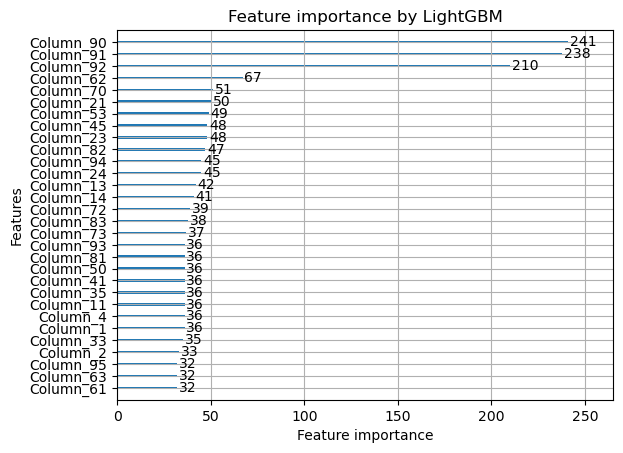

In [271]:
# xgb_cm, lgbm_cm, cat_cm

from xgboost import plot_importance
from matplotlib import pyplot


# 특성 중요도 가져오기 및 시각화
lgb.plot_importance(lgbm_model, importance_type='split', title='Feature importance by LightGBM', max_num_features=30)
plt.show()

NameError: name 'feature_names' is not defined

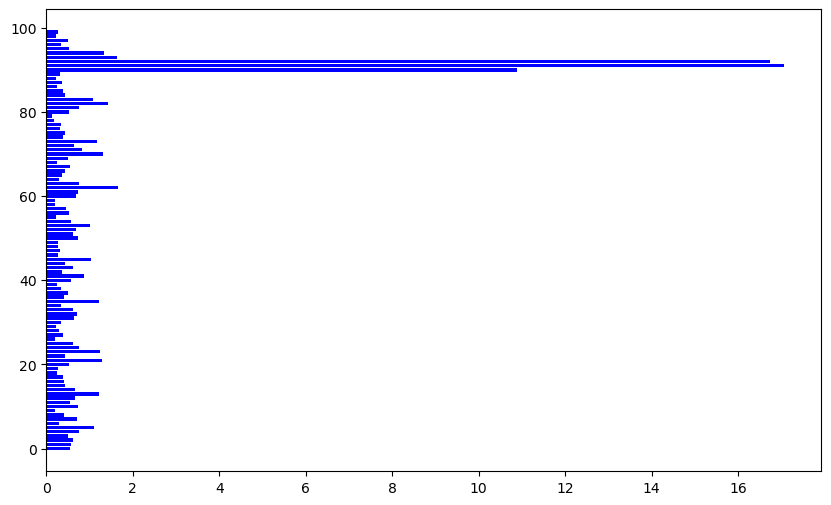

In [275]:
# 피처 중요도 가져오기
feature_importances = cat_model.get_feature_importance()

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of CatBoost Model')
plt.gca().invert_yaxis()  # 가장 중요한 피처가 위로 오도록
plt.show()

In [276]:
import seaborn as sns
# 피처 중요도 가져오기
feature_importances = cat_model.get_feature_importance()

# 데이터 프레임 생성
import pandas as pd
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=features_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance of CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

TypeError: unhashable type: 'CatBoostClassifier'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# cross val 
# timeserise kfold



# 추가변수 넣어서 해보기 -> 이건 안봐도댐
### +상관계수 corr파악, feature importance 파악
환율,금리,cofix 변수  
 0보다 크면 1, 작으면 0 (log 변환 할 필요없을듯)

In [27]:
import pandas as pd
base = pd.read_csv('C:/Users/chanyoung/Desktop/young_workspace/ba_module1/ML_pjt/BANK_pjt/base.csv',index_col=0)
base

,한국은행 기준금리
Date,
2013-01-01,2.75
2013-01-02,2.75
2013-01-03,2.75
2013-01-04,2.75
2013-01-05,2.75
...,...
2024-04-07,3.50
2024-04-08,3.50
2024-04-09,3.50


In [29]:
# # Convert 'Date' column to datetime format
# base['Date'] = pd.to_datetime(base['Date'])

# Calculate changes in interest rate
base['Rate Change'] = base['한국은행 기준금리']





# Identify rise in interest rates
base['Rise'] = base['Rate Change'] > 0

# Create a column that reflects 0 until an increase after a decrease
# Initialize the column with NaN
base['Signal'] = float('nan')

# Find initial state assuming no prior information: treat the first row separately
if base.loc[0, 'Rise']:
    base.loc[0, 'Signal'] = 1
else:
    base.loc[0, 'Signal'] = 0

# Process subsequent entries
for i in range(1, len(base)):
    if base.loc[i, 'Rise']:
        base.loc[i, 'Signal'] = 1
    else:
        base.loc[i, 'Signal'] = base.loc[i - 1, 'Signal'] if pd.notna(base.loc[i - 1, 'Signal']) else 0

# Fill NaN with forward fill method since after a drop it should be 0 until the next rise
base['Signal'].fillna(method='ffill', inplace=True)

# Drop intermediate columns and show result
data_clean = base.drop(columns=['Rate Change', 'Rise'])
data_clean.head()

KeyError: 0

In [17]:
base.rename(columns={'한국은행 기준금리':'base'}, inplace=True)
base

,base
Date,
2013-01-01,2.75
2013-01-02,2.75
2013-01-03,2.75
2013-01-04,2.75
2013-01-05,2.75
...,...
2024-04-07,3.50
2024-04-08,3.50
2024-04-09,3.50


In [ ]:
# df_log_target = pd.merge(df_log, exchange, on='Date', how='inner')

# merge()

In [11]:
# # 전날 대비 상승 여부를 나타내는 새로운 열 'base Change'를 생성
# base['base_class'] = (base['base'].diff() > 0).astype(int)
# base

,base,base_class
Date,,
2013-01-01,2.75,0
2013-01-02,2.75,0
2013-01-03,2.75,0
2013-01-04,2.75,0
2013-01-05,2.75,0
...,...,...
2024-04-07,3.50,0
2024-04-08,3.50,0
2024-04-09,3.50,0


In [25]:
base

,base,상승,상승_유지
Date,,,
2013-01-01,2.75,0,0
2013-01-02,2.75,0,0
2013-01-03,2.75,0,0
2013-01-04,2.75,0,0
2013-01-05,2.75,0,0
...,...,...,...
2024-04-07,3.50,0,0
2024-04-08,3.50,0,0
2024-04-09,3.50,0,0


In [26]:
base[588:594]

,base,상승,상승_유지
Date,,,
2014-08-12,2.50,0,0
2014-08-13,2.50,0,0
2014-08-14,2.25,0,0
2014-08-15,2.25,0,0
2014-08-16,2.25,0,0
2014-08-17,2.25,0,0


In [13]:
# # Creating a new column to indicate if the interest rate has increased from the previous value
# base['base_class'] = (base['한국은행 기준금리'].diff() > 0).astype(int)

# Propagate the last valid '1' until a change occurs
base['base_class'] = base['base_class'].replace(to_replace=0, method='ffill').where(base['base_class'].diff() != 0, 0)

In [14]:
base[588:594]

,base,base_class
Date,,
2014-08-12,2.50,0
2014-08-13,2.50,0
2014-08-14,2.25,0
2014-08-15,2.25,0
2014-08-16,2.25,0
2014-08-17,2.25,0


In [15]:
base.dtypes

base          float64
base_class      int32
dtype: object

In [106]:
base_target.head(50)

,base Change
Date,
2013-01-01,0
2013-01-02,0
2013-01-03,0
2013-01-04,0
2013-01-05,0
2013-01-06,0
2013-01-07,0
2013-01-08,0
2013-01-09,0


In [1]:
base_target.to_csv('base_target.csv')

NameError: name 'base_target' is not defined

,Open,High,Low,Close,Volume,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240
Date,,,,,,,,,,,
2014-12-24,0.001371,0.010236,0.002067,0.010236,2.194333,0.002341,-0.001513,-0.002689,-0.001989,-0.000359,-0.000632
2014-12-26,0.013606,0.007440,0.012992,0.002712,-1.080436,0.003159,0.000894,-0.002495,-0.001929,-0.000208,-0.000458
2014-12-29,0.008745,0.006046,-0.005450,-0.006112,0.323856,0.003696,0.001786,-0.002367,-0.001662,-0.000192,-0.000448
2014-12-30,-0.012130,-0.012130,-0.029108,-0.028327,1.088933,0.001638,0.000480,-0.001745,-0.001297,-0.000229,-0.000432
2015-01-02,-0.034486,-0.032383,-0.007766,-0.009859,-1.195077,-0.003827,-0.001373,-0.002669,-0.001852,-0.000395,-0.000559
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.017550,-0.019313,-0.019778,-0.016621,0.174036,-0.012215,-0.005591,0.002355,0.003296,0.002340,0.001336
2024-04-02,-0.022848,-0.014733,-0.010668,-0.003731,0.098525,-0.012728,-0.005742,0.000791,0.003296,0.002215,0.001191
2024-04-03,-0.000625,-0.006203,-0.006964,-0.018868,-0.222564,-0.012281,-0.004045,-0.000101,0.003438,0.001955,0.001209


In [ ]:
df_log_target = pd.merge(df_log, base_Change, on='Date', how='inner')